# Deteção de Fraudes em Transações Financeiras aplicando a Metodologia CRISP-DM

Este projeto visa a deteção e prevenção de atividades fraudulentas em transações financeiras. Para isso, é utilizado um conjunto de dados sintéticos fornecido pela empresa JP Morgan, intitulado "fraud_payment_data". No âmbito deste projeto, é aplicada a metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining), que permite uma maior eficácia no desenvolvimento e implementação de modelos de machine learning.

# 1. Compreensão do Negócio

## Objetivos

* Fortalecimento da segurança nas empresas;
* Prevenção de perdas financeiras significativas;
* Manutenção da boa reputação das empresas;
* Aumento da confiança dos clientes.


# 2. Compreensão dos Dados

## 2.1. Recolha de dados inicial

#### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.tree as tree
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportions_ztest
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#### Importação do dataset

In [2]:
df = pd.read_csv('fraud_payment_data')

## 2.2. Análise descritiva

#### Primeiras linhas do dataset

In [3]:
df.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


#### Informações gerais

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498177 entries, 0 to 1498176
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1498177 non-null  object 
 1   Transaction_Id    1498177 non-null  object 
 2   Sender_Id         1279291 non-null  object 
 3   Sender_Account    1279291 non-null  object 
 4   Sender_Country    1279291 non-null  object 
 5   Sender_Sector     1279291 non-null  float64
 6   Sender_lob        1279291 non-null  object 
 7   Bene_Id           1282284 non-null  object 
 8   Bene_Account      1282284 non-null  object 
 9   Bene_Country      1282284 non-null  object 
 10  USD_amount        1498177 non-null  float64
 11  Label             1498177 non-null  int64  
 12  Transaction_Type  1498177 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 148.6+ MB


#### Número de linhas e colunas

In [5]:
print(df.shape)

(1498177, 13)


#### Estatísticas gerais

In [6]:
df.describe(include='all')

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
count,1498177,1498177,1279291,1279291,1279291,1.279291e+06,1279291,1282284,1282284,1282284,1.498177e+06,1.498177e+06,1498177
unique,639300,1498177,59071,75161,252,NaN,1,279357,295031,252,NaN,NaN,8
top,2051-01-26 03:27:02,EXCHANGE-10115,JPMC-CLIENT-1730807,ACCOUNT-1591424,USA,NaN,CCB,JPMC-CLIENT-1119942,ACCOUNT-1029621,USA,NaN,NaN,MAKE-PAYMENT
freq,100,1,157,99,997236,NaN,1279291,80,61,757908,NaN,NaN,557735
mean,NaN,NaN,NaN,NaN,NaN,2.502133e+04,NaN,NaN,NaN,NaN,5.134698e+02,2.057100e-02,NaN
std,NaN,NaN,NaN,NaN,NaN,1.443171e+04,NaN,NaN,NaN,NaN,5.398089e+02,1.419431e-01,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.253400e+04,NaN,NaN,NaN,NaN,1.386900e+02,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.502300e+04,NaN,NaN,NaN,NaN,4.041600e+02,0.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.753050e+04,NaN,NaN,NaN,NaN,7.340700e+02,0.000000e+00,NaN


#### Valores nulos e duplicados

In [7]:
val_nulos = df.isnull().sum()
val_duplicados = df.duplicated().sum()

print("Valores nulos por coluna: ")
print(val_nulos)
print("")
print("Número de valores duplicados: ", val_duplicados)

Valores nulos por coluna: 
Time_step                0
Transaction_Id           0
Sender_Id           218886
Sender_Account      218886
Sender_Country      218886
Sender_Sector       218886
Sender_lob          218886
Bene_Id             215893
Bene_Account        215893
Bene_Country        215893
USD_amount               0
Label                    0
Transaction_Type         0
dtype: int64

Número de valores duplicados:  0


#### Valores únicos

In [8]:
val_unicos = df.nunique()

print("Número de valores únicos por coluna: ")
print(val_unicos)

Número de valores únicos por coluna: 
Time_step            639300
Transaction_Id      1498177
Sender_Id             59071
Sender_Account        75161
Sender_Country          252
Sender_Sector         50000
Sender_lob                1
Bene_Id              279357
Bene_Account         295031
Bene_Country            252
USD_amount           100685
Label                     2
Transaction_Type          8
dtype: int64


#### Número de transações fraudulentas e não fraudulentas

In [9]:
count_fraud = sum(df['Label'] == 1)
count_no_fraud = sum(df['Label'] == 0)

print('Número de transações fraudulentas: ', count_fraud)
print('Número de transações não fraudulentas: ', count_no_fraud)

Número de transações fraudulentas:  30819
Número de transações não fraudulentas:  1467358


#### Período abrangido

In [10]:
df['Time_step'] = pd.to_datetime(df['Time_step'])


min_date = df['Time_step'].min()
max_date = df['Time_step'].max()

time_range = max_date - min_date

print(f"Data da transação mais antiga: {min_date}")
print(f"Data da transação mais recente: {max_date}")
print(f"Intervalo de tempo abrangido pelas transações: {time_range}")

Data da transação mais antiga: 2022-03-15 10:24:00
Data da transação mais recente: 2054-09-15 13:07:24
Intervalo de tempo abrangido pelas transações: 11872 days 02:43:24


#### Distribuição "Transaction Amount (USD)"

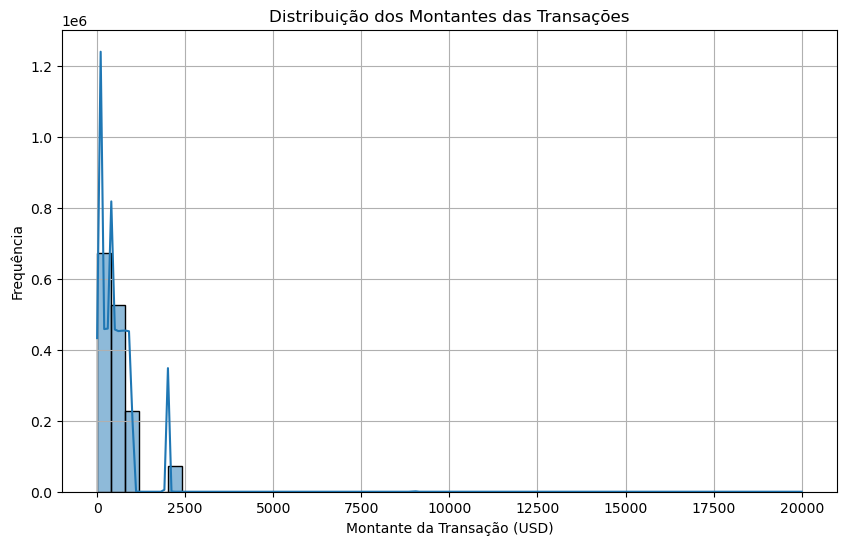

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['USD_amount'], bins=50, kde=True)
plt.title('Distribuição dos Montantes das Transações')
plt.xlabel('Montante da Transação (USD)')
plt.ylabel('Frequência')
plt.grid(True)
plt.savefig('Distribuição_TransAmount.png')
plt.show()

#### Contagem dos tipos de transação

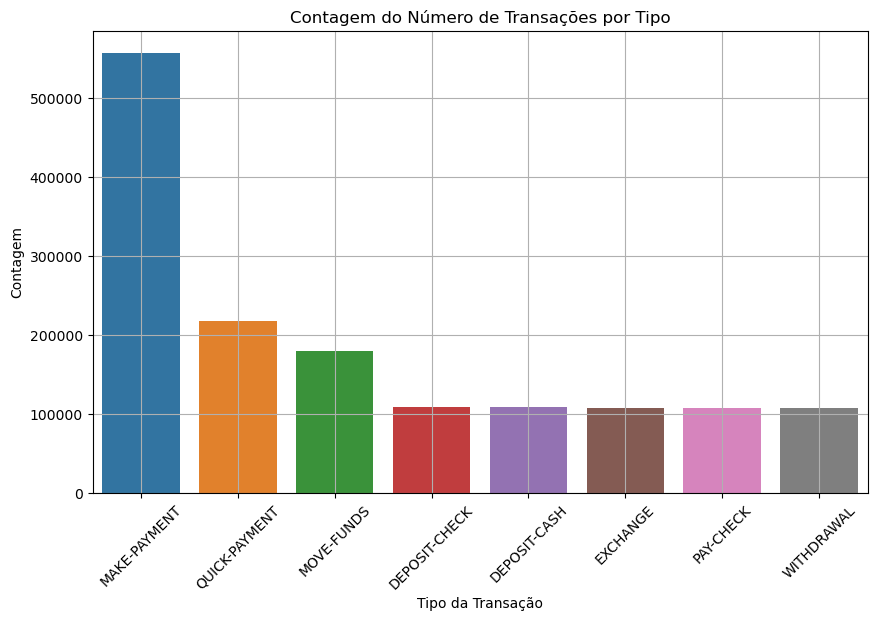

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='Transaction_Type', order=df['Transaction_Type'].value_counts().index)
plt.title('Contagem do Número de Transações por Tipo')
plt.xlabel('Tipo da Transação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('TransType_Count.png')
plt.show()

In [13]:
contagem_transacoes = df['Transaction_Type'].value_counts()
print(contagem_transacoes.sort_values())

Transaction_Type
WITHDRAWAL       107726
PAY-CHECK        107851
EXCHANGE         108167
DEPOSIT-CASH     109409
DEPOSIT-CHECK    109477
MOVE-FUNDS       180205
QUICK-PAYMENT    217607
MAKE-PAYMENT     557735
Name: count, dtype: int64


## 2.3. Análise exploratória

#### Distribuição "label"

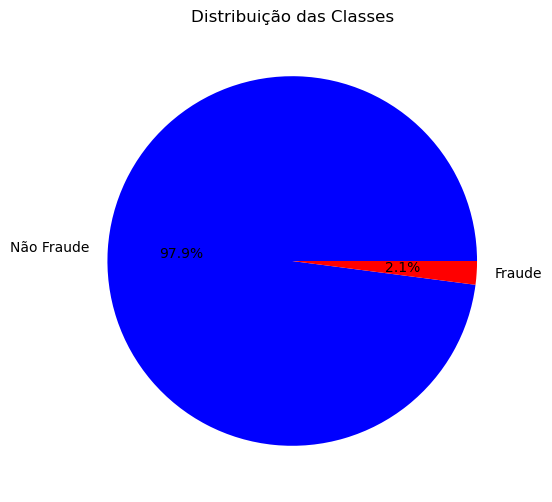

In [14]:
label_counts = df['Label'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], labels=['Não Fraude', 'Fraude'])
plt.title('Distribuição das Classes')
plt.ylabel('')
plt.savefig('distribuição_label.png')
plt.show()

#### Matriz de Correlação

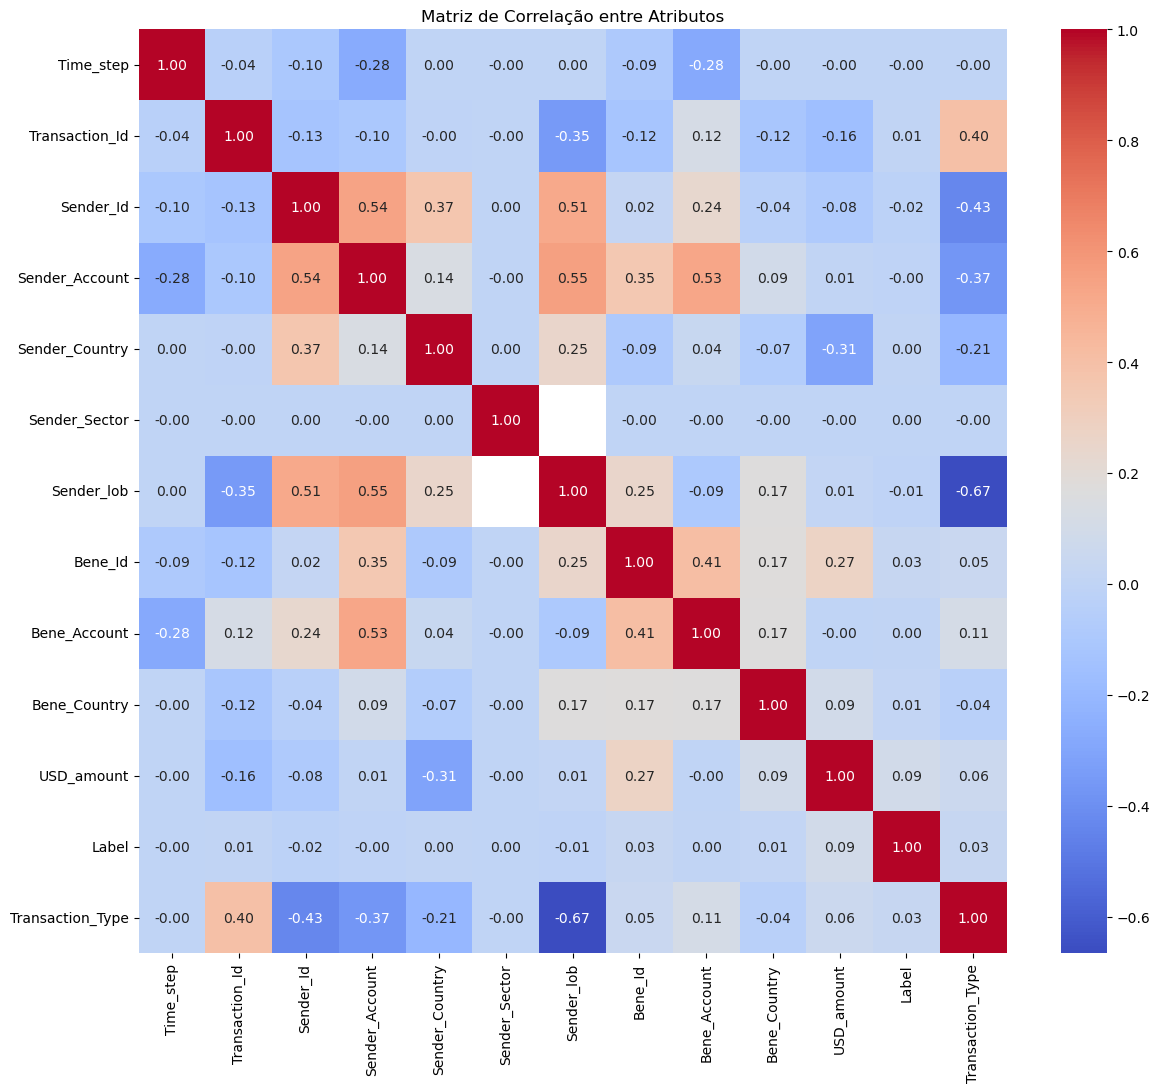

In [15]:
encoded_df = df.copy()

colunas_categoricas = encoded_df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in colunas_categoricas:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

correlation_matrix = encoded_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Atributos')
plt.savefig('MCorrelação.png')
plt.show()

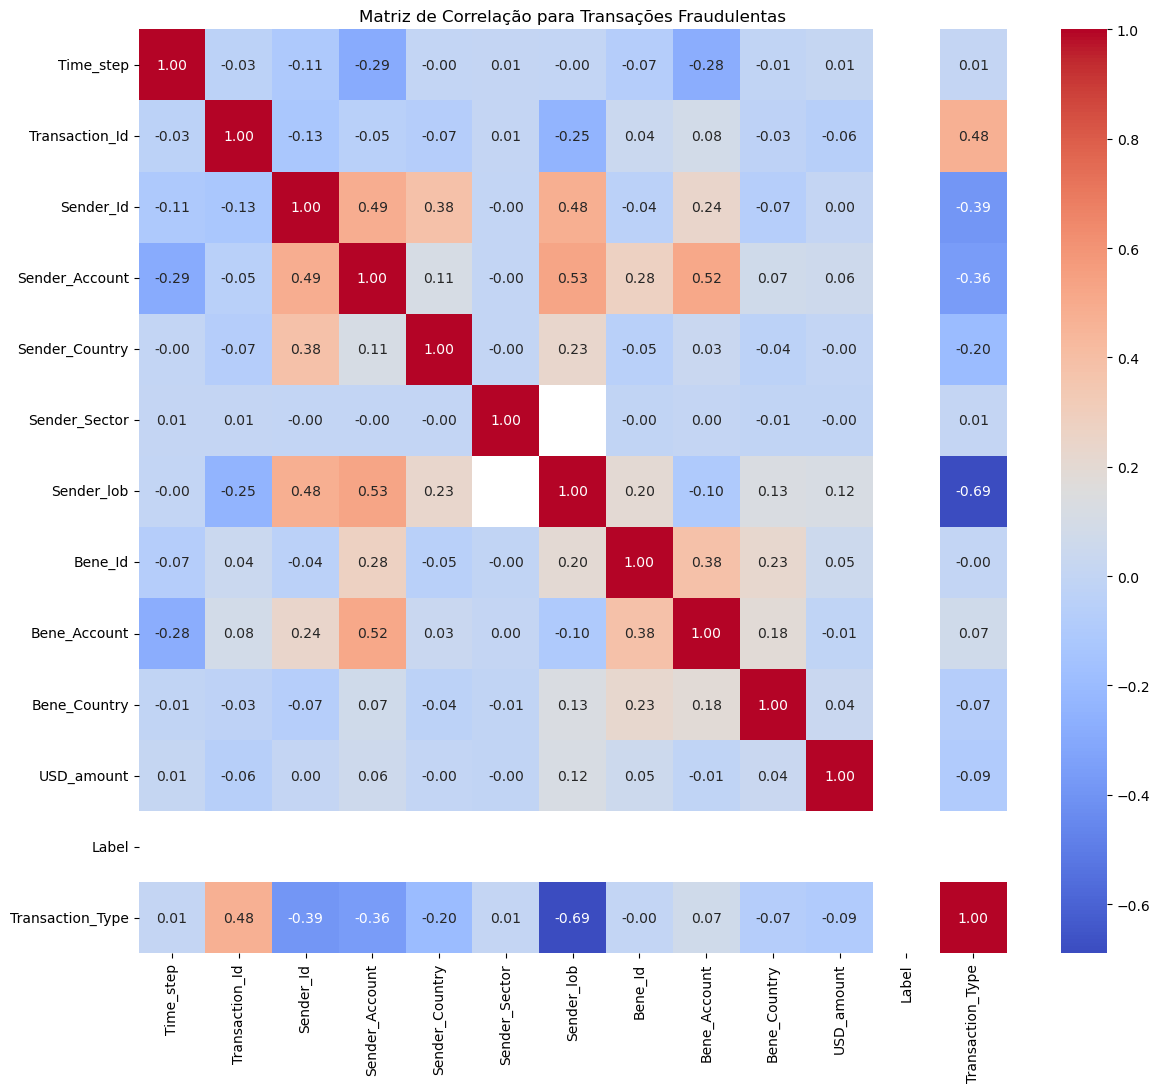

In [16]:
encoded_df_1 = encoded_df[encoded_df['Label'] == 1]

correlation_matrix = encoded_df_1.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação para Transações Fraudulentas')
plt.savefig('MCorrelação_Fraudulentas.png')
plt.show()

In [17]:
encoded_df.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,219126,42193,414,239,35537.0,0,279357,295031,252,558.43,0,7
1,2022-03-15 10:24:00,1174072,42193,418,239,15287.0,0,215452,1601,40,622.78,0,6
2,2022-03-15 10:24:00,163387,59071,75161,252,NaN,1,269013,292413,239,802.54,0,0
3,2022-03-15 10:24:00,830240,53492,74491,239,38145.0,0,269015,292383,239,989.09,0,5
4,2022-03-15 10:24:00,218282,59071,75161,252,NaN,1,268998,292024,239,786.78,0,1


#### Hipótese 1: As transações fraudulentas têm um valor médio mais alto 

* Hipótese Nula (H0): A distribuição dos valores de USD_amount é igual entre transações fraudulentas e não fraudulentas.

* Hipótese Alternativa (H1): A distribuição dos valores de USD_amount não é igual entre transações fraudulentas e não fraudulentas.

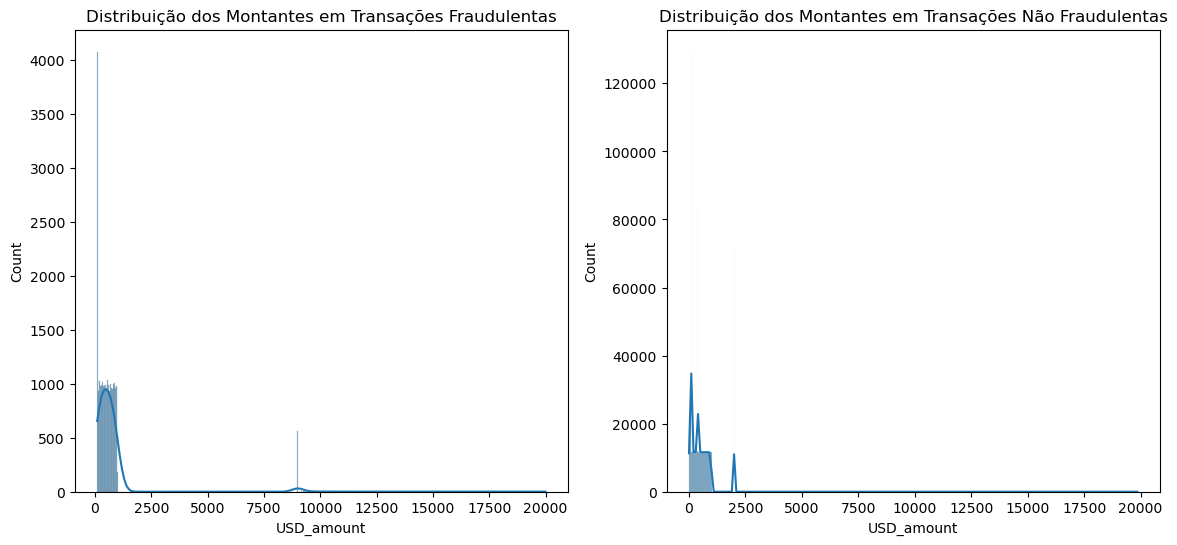

In [18]:
trans_fraud = df[df['Label'] == 1]['USD_amount']
trans_no_fraud = df[df['Label'] == 0]['USD_amount']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(trans_fraud, kde=True)
plt.title('Distribuição dos Montantes em Transações Fraudulentas')

plt.subplot(1, 2, 2)
sns.histplot(trans_no_fraud, kde=True)
plt.title('Distribuição dos Montantes em Transações Não Fraudulentas')

plt.show()

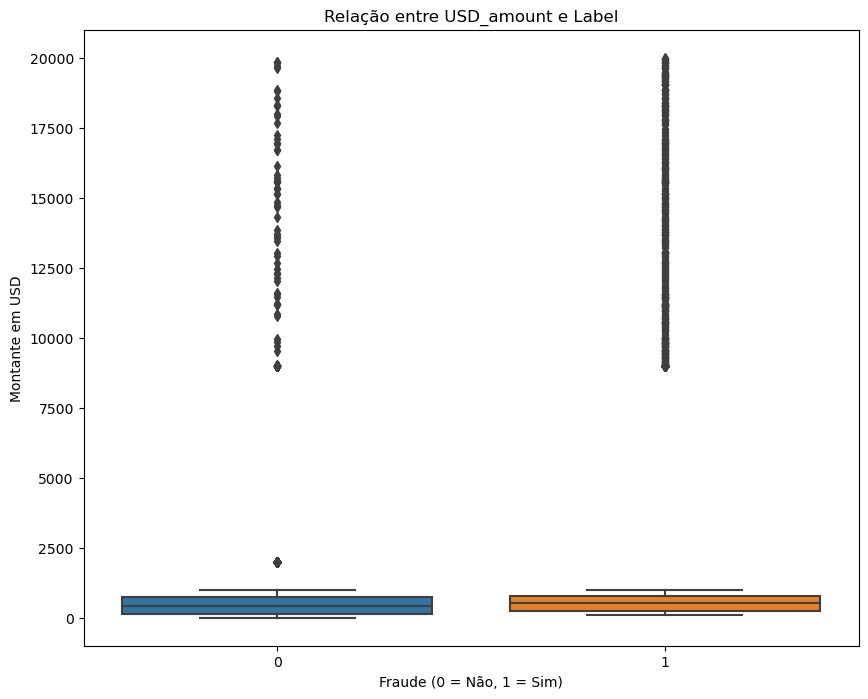

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Label', y='USD_amount', data=df)
plt.title('Relação entre USD_amount e Label')
plt.xlabel('Fraude (0 = Não, 1 = Sim)')
plt.ylabel('Montante em USD')
plt.savefig('Relação_USD_Label.png')
plt.show()

In [21]:
nivel_significancia=0.05

estat_u, p_value = stats.mannwhitneyu(trans_fraud, trans_no_fraud)

print("Estatística U de Mann-Whitney:", estat_u)
print("Valor-p:", p_value)

if p_value < nivel_significancia:
    print("Rejeita-se a hipótese nula: A distribuição dos valores de USD_amount é diferente entre transações fraudulentas e não fraudulentas.")
else:
    print("Não se rejeita a hipótese nula: Não há evidência suficiente para afirmar que as distribuições são diferentes.")


Estatística U de Mann-Whitney: 25623822358.5
Valor-p: 0.0
Rejeita-se a hipótese nula: A distribuição dos valores de USD_amount é diferente entre transações fraudulentas e não fraudulentas.


#### Hipótese 2: Relação entre o tipo de transação e a classificação de transações

* Hipótese Nula (H0): Não existe relação entre 'Transaction_Type' e 'Label'.

* Hipótese Alternativa (H1): Existe relação entre 'Transaction_Type' e 'Label'.

In [21]:
nivel_significancia=0.05

contingency_table = pd.crosstab(df['Transaction_Type'], df['Label'])

tobs, valor_p, dof, esperado  = stats.chi2_contingency(contingency_table)

print(contingency_table)
print(' ')
print("Esperado:", esperado)
print("valor-p:", valor_p)
print("tobs:", tobs)
print("dof:", dof)
print('')

if(valor_p<nivel_significancia):
    print("As variáveis não são independentes.")
else:
    print("As variáveis são independentes.")

Label                  0     1
Transaction_Type              
DEPOSIT-CASH      106637  2772
DEPOSIT-CHECK     108128  1349
EXCHANGE          105641  2526
MAKE-PAYMENT      550192  7543
MOVE-FUNDS        177166  3039
PAY-CHECK         104806  3045
QUICK-PAYMENT     209672  7935
WITHDRAWAL        105116  2610
 
Esperado: [[107158.34739286   2250.65260714]
 [107224.94856482   2252.05143518]
 [105941.89657564   2225.10342436]
 [546261.83296767  11473.16703233]
 [176498.00283278   3706.99716722]
 [105632.39701184   2218.60298816]
 [213130.60626748   4476.39373252]
 [105509.96838691   2216.03161309]]
valor-p: 0.0
tobs: 5146.1877342837115
dof: 7

As variáveis não são independentes.


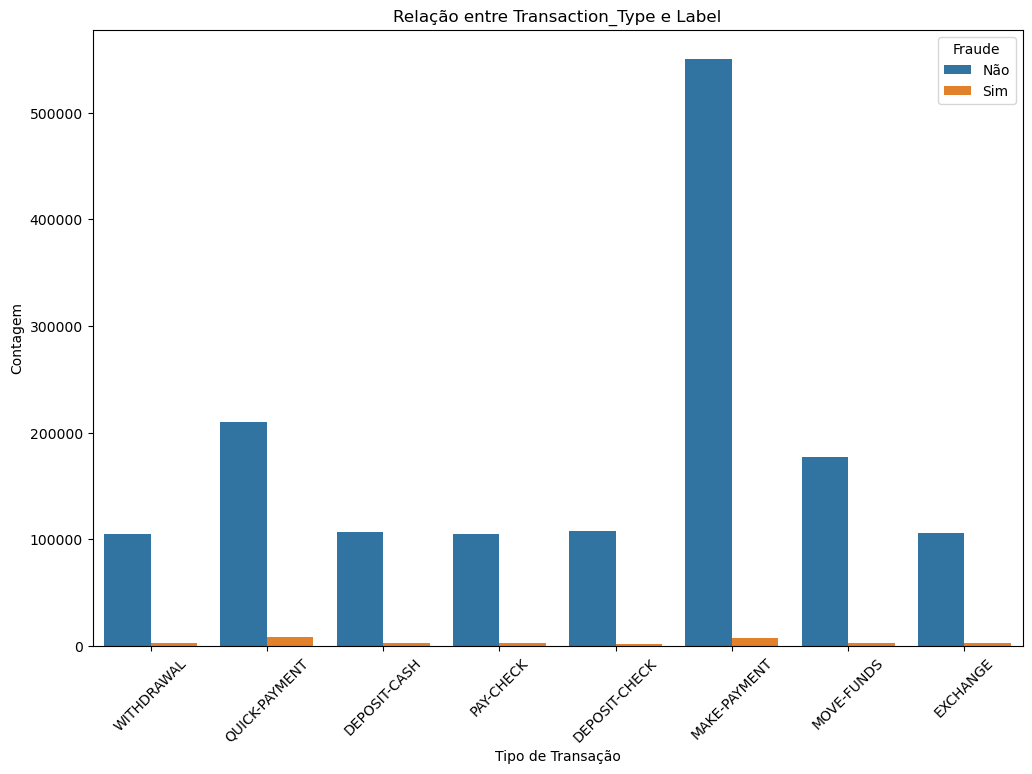

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Transaction_Type', hue='Label', data=df)
plt.title('Relação entre Transaction_Type e Label')
plt.xlabel('Tipo de Transação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Fraude', loc='upper right', labels=['Não', 'Sim'])
plt.savefig('Relação_Type_Label.png')
plt.show()

In [23]:
fraud_proportion = df.groupby('Transaction_Type')['Label'].mean().sort_values(ascending=False)
print(fraud_proportion)

Transaction_Type
QUICK-PAYMENT    0.036465
PAY-CHECK        0.028233
DEPOSIT-CASH     0.025336
WITHDRAWAL       0.024228
EXCHANGE         0.023353
MOVE-FUNDS       0.016864
MAKE-PAYMENT     0.013524
DEPOSIT-CHECK    0.012322
Name: Label, dtype: float64


#### Hipótese 3: Relação entre os países envolvidos nas transações e a classificação de transações

* Hipótese Nula (H0): Não há relação entre “Sender_Country” e “Label”.

* Hipótese Alternativa (H1): Existe relação entre “Sender_Country” e “Label”.


In [24]:
contingency_table = pd.crosstab(df['Sender_Country'], df['Label'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Estatística Qui-Quadrado:", chi2_stat)
print(f"Valor p: ", p_value)
print("Graus de Liberdade:", dof)
print("Frequências Esperadas:\n", expected)

if(valor_p<nivel_significancia):
    print("As variáveis não são independentes.")
else:
    print("As variáveis são independentes.")

Estatística Qui-Quadrado: 2556.2819246569607
Valor p:  0.0
Graus de Liberdade: 251
Frequências Esperadas:
 [[5.71812287e+02 1.21877134e+01]
 [6.16852296e+02 1.31477045e+01]
 [9.75214105e+02 2.07858947e+01]
 [7.25535795e+02 1.54642048e+01]
 [6.89307962e+02 1.46920380e+01]
 [6.03144467e+02 1.28555333e+01]
 [6.93224484e+02 1.47755155e+01]
 [6.49163606e+02 1.38363938e+01]
 [7.55888845e+02 1.61111553e+01]
 [6.88328831e+02 1.46711686e+01]
 [6.62871435e+02 1.41285650e+01]
 [7.75471457e+02 1.65285428e+01]
 [5.14043580e+02 1.09564204e+01]
 [7.04974052e+02 1.50259480e+01]
 [7.67638412e+02 1.63615878e+01]
 [8.79259304e+02 1.87406962e+01]
 [7.79387980e+02 1.66120203e+01]
 [7.69596673e+02 1.64033265e+01]
 [6.49163606e+02 1.38363938e+01]
 [4.12213994e+02 8.78600569e+00]
 [5.61041850e+02 1.19581503e+01]
 [7.36306232e+02 1.56937679e+01]
 [7.57847106e+02 1.61528941e+01]
 [7.30431448e+02 1.55685516e+01]
 [6.79516656e+02 1.44833443e+01]
 [8.03866245e+02 1.71337546e+01]
 [6.27622732e+02 1.33772676e+01]
 [

* Criação de uma nova variável para contagem de transações (0 e 1) para cada país


In [25]:
label_sendercountry = df.groupby(['Sender_Country', 'Label']).size().unstack(fill_value=0)
print(label_sendercountry.head(20))

Label              0   1
Sender_Country          
AFGHANISTAN      568  16
ALAND-ISLANDS    620  10
ALBANIA          969  27
ALGERIA          725  16
AMERICAN-SAMOA   697   7
ANDORRA          604  12
ANGOLA           682  26
ANGUILLA         653  10
ANTARCTICA       742  30
ANTIGUA-BARBUDA  690  13
ARGENTINA        656  21
ARMENIA          774  18
ARUBA            518   7
AUSTRALIA        707  13
AUSTRIA          766  18
AZERBAIJAN       887  11
BAHAMAS          770  26
BAHRAIN          769  17
BANGLADESH       650  13
BARBADOS         411  10


 * Ordenar países com maior número de fraudes

In [26]:
fraude_count_ord = label_sendercountry.sort_values(by=1, ascending=False)
print(fraude_count_ord[[1]].head(20))

Label                  1
Sender_Country          
USA                21242
CANADA               949
GERMANY               49
EL-SALVADOR           41
MOZAMBIQUE            41
GUAM                  41
ITALY                 39
SOUTH-SUDAN           39
SAO-TOME-PRINCIPE     38
LIECHTENSTEIN         36
BURUNDI               34
GEORGIA               34
SAINT-KITTS-NEVIS     33
COMOROS               32
ECUADOR               32
MAYOTTE               31
GABON                 31
RUSSIAN               30
ANTARCTICA            30
NIGERIA               30


 * Calcular a percentagem de fraude e ordenar em ordem decrescente

In [27]:
label_sendercountry['Percentagem de fraude'] = (label_sendercountry[1] / (label_sendercountry[0] + label_sendercountry[1])) * 100

percentagem_fraude_ord = label_sendercountry.sort_values(by='Percentagem de fraude', ascending=False)

print(percentagem_fraude_ord.head(20))

Label                     0   1  Percentagem de fraude
Sender_Country                                        
MAYOTTE                 486  31               5.996132
LITHUANIA               433  26               5.664488
SAINT-KITTS-NEVIS       553  33               5.631399
TONGA                   396  23               5.489260
SOUTH-SUDAN             729  39               5.078125
CURACAO                 488  23               4.500978
BURUNDI                 729  34               4.456094
PORTUGAL                474  22               4.435484
GUAM                    888  41               4.413348
SAO-TOME-PRINCIPE       838  38               4.337900
SLOVENIA                669  29               4.154728
EL-SALVADOR             952  41               4.128902
MOZAMBIQUE              958  41               4.104104
BOSNIA-AND-HERZEGOVINA  375  16               4.092072
ITALY                   940  39               3.983657
HONG-KONG               703  29               3.961749
INDONESIA 

 * Verificar o equílibro de transações fraudulentas e não fraudulentas dos top 3 países com maior número de fraudes

In [28]:
top3_paises_fraudecount = label_sendercountry.loc[['USA', 'CANADA', 'GERMANY']]
print(top3_paises_fraudecount)

Label                0      1  Percentagem de fraude
Sender_Country                                      
USA             975994  21242               2.130088
CANADA           26434    949               3.465654
GERMANY          73382     49               0.066729


#### Hipótese 4: Relação entre os setores dos remetentes e a classificação de transações

* Hipótese Nula (H0): Não há relação entre "Sender_Sector" e "label".

* Hipótese Alternativa (H1): Existe uma relação entre "Sender_Sector" e "label".

In [29]:
contingency_table = pd.crosstab(df['Sender_Sector'], df['Label'])

tobs, valor_p, dof, esperado  = stats.chi2_contingency(contingency_table)

print(contingency_table)
print(' ')
print("Esperado:", esperado)
print("valor-p:", valor_p)
print("tobs:", tobs)
print("dof:", dof)
print('')

if(valor_p<nivel_significancia):
    print("As variáveis não são independentes.")
else:
    print("As variáveis são independentes.")

Label           0  1
Sender_Sector       
0.0            22  2
1.0            22  0
2.0            17  0
3.0            27  0
4.0            25  0
...            .. ..
49995.0        22  1
49996.0        25  1
49997.0        23  0
49998.0        31  1
49999.0        29  1

[50000 rows x 2 columns]
 
Esperado: [[23.49913507  0.50086493]
 [21.54087381  0.45912619]
 [16.64522067  0.35477933]
 ...
 [22.52000444  0.47999556]
 [31.33218009  0.66781991]
 [29.37391883  0.62608117]]
valor-p: 0.8124723168492127
tobs: 49718.354788382705
dof: 49999

As variáveis são independentes.


## 2.4. Verificar a qualidade dos dados

#### Montantes negativos ou zero

In [32]:
val_neg_0 = df[df['USD_amount'] <= 0]
val_neg_0.head(22)

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
10621,2022-06-09 23:54:01,PAYMENT-18999,JPMC-CLIENT-18825,ACCOUNT-18836,USA,7738.0,CCB,BILL-COMPANY-19000,ACCOUNT-19001,SOUTH-AFRICA,0.0,0,MAKE-PAYMENT
149761,2025-06-20 02:44:20,PAYMENT-217697,JPMC-CLIENT-217580,ACCOUNT-217592,USA,24397.0,CCB,BILL-COMPANY-217698,ACCOUNT-217699,USA,0.0,0,MAKE-PAYMENT
176816,2026-02-03 19:24:24,PAYMENT-265331,JPMC-CLIENT-265235,ACCOUNT-265245,USA,30949.0,CCB,BILL-COMPANY-265332,ACCOUNT-265333,USA,0.0,0,MAKE-PAYMENT
202768,2026-08-25 00:54:27,PAYMENT-289988,JPMC-CLIENT-289739,ACCOUNT-289749,USA,30197.0,CCB,BILL-COMPANY-289989,ACCOUNT-289990,USA,0.0,0,MAKE-PAYMENT
269073,2028-01-12 02:04:36,PAYMENT-388698,JPMC-CLIENT-388507,ACCOUNT-388518,USA,12534.0,CCB,BILL-COMPANY-388699,ACCOUNT-388700,ITALY,0.0,0,MAKE-PAYMENT
316686,2029-01-18 07:24:43,PAYMENT-467720,JPMC-CLIENT-467681,ACCOUNT-467691,USA,23729.0,CCB,BILL-COMPANY-467721,ACCOUNT-467722,USA,0.0,0,MAKE-PAYMENT
448323,2031-11-01 21:05:00,PAYMENT-646524,JPMC-CLIENT-646245,ACCOUNT-646295,PALESTINE,37221.0,CCB,BILL-COMPANY-646525,ACCOUNT-646526,MALAYSIA,0.0,0,MAKE-PAYMENT
450784,2031-11-22 00:05:01,PAYMENT-664155,JPMC-CLIENT-664061,ACCOUNT-664071,USA,69.0,CCB,BILL-COMPANY-664156,ACCOUNT-664157,USA,0.0,0,MAKE-PAYMENT
495710,2032-11-10 02:05:07,PAYMENT-726669,JPMC-CLIENT-726546,ACCOUNT-726557,USA,31928.0,CCB,BILL-COMPANY-726670,ACCOUNT-726671,OMAN,0.0,0,MAKE-PAYMENT
573012,2034-08-13 06:15:18,PAYMENT-836106,JPMC-CLIENT-836009,ACCOUNT-836087,HAITI,44593.0,CCB,BILL-COMPANY-836107,ACCOUNT-836108,MOROCCO,0.0,0,MAKE-PAYMENT


In [33]:
val_neg_0.describe()

,Time_step,Sender_Sector,USD_amount,Label
count,22,22.000000,22.0,22.0
mean,2036-02-11 11:56:21.727272960,23582.954545,0.0,0.0
min,2022-06-09 23:54:01,69.000000,0.0,0.0
25%,2029-09-29 16:49:47.249999872,13151.750000,0.0,0.0
50%,2034-11-27 09:40:19.500000,24657.000000,0.0,0.0
75%,2040-10-29 23:18:27.249999872,31683.250000,0.0,0.0
max,2050-06-20 15:16:58,45994.000000,0.0,0.0
std,NaN,13837.737940,0.0,0.0


# 3. Preparação dos Dados

## 3.1. Seleção de variáveis

In [34]:
df_selected = df.copy()

In [35]:
df_selected.drop(columns=['Sender_lob'], inplace=True)

In [36]:
df_selected.shape

(1498177, 12)

## 3.2. Limpeza dos dados

#### Remoção valores nulos

In [37]:
df_clean_nulos = df_selected.dropna()
print(df_clean_nulos.shape)

(1063398, 12)


In [38]:
print('Valores nulos removidos:', df.shape[0] - df_clean_nulos.shape[0])

Valores nulos removidos: 434779


#### Agregar USA  e UNITED-STATES no mesmo valor (Sender_country e Bene_country)

In [39]:
country_standard = {
    'USA': 'UNITED-STATES',
    'UNITED-STATES': 'UNITED-STATES',
}

df_clean_nulos['Sender_Country'] = df_clean_nulos['Sender_Country'].replace(country_standard)
df_clean_nulos['Bene_Country'] = df_clean_nulos['Bene_Country'].replace(country_standard)


C:\Users\laura\AppData\Local\Temp\ipykernel_13852\1363101078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_nulos['Sender_Country'] = df_clean_nulos['Sender_Country'].replace(country_standard)
C:\Users\laura\AppData\Local\Temp\ipykernel_13852\1363101078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_nulos['Bene_Country'] = df_clean_nulos['Bene_Country'].replace(country_standard)


In [40]:
val_unicos_stand = df_clean_nulos.nunique()
val_unicos_stand

Time_step            544724
Transaction_Id      1063398
Sender_Id             58423
Sender_Account        73999
Sender_Country          251
Sender_Sector         50000
Bene_Id              278084
Bene_Account         293222
Bene_Country            251
USD_amount           100310
Label                     2
Transaction_Type          4
dtype: int64

#### Conversão de variáveis categóricas em numéricas 

In [41]:
# Converter 'Time_step' para datetime e depois para timestamp
df_clean_nulos['Time_step'] = pd.to_datetime(df_clean_nulos['Time_step']).astype('int64') / 10**9 # nanosegundos para segundos

# Aplicar o "Label Encoding" nas colunas categóricas
label_encoder = LabelEncoder()
for column in ['Transaction_Id', 'Sender_Id', 'Sender_Account', 'Sender_Country', 'Sender_Sector', 'Bene_Id', 'Bene_Account', 'Bene_Country', 'Transaction_Type']:
    df_clean_nulos[column] = label_encoder.fit_transform(df_clean_nulos[column].astype(str))


C:\Users\laura\AppData\Local\Temp\ipykernel_13852\2834862878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_nulos['Time_step'] = pd.to_datetime(df_clean_nulos['Time_step']).astype('int64') / 10**9 # nanosegundos para segundos
C:\Users\laura\AppData\Local\Temp\ipykernel_13852\2834862878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_nulos[column] = label_encoder.fit_transform(df_clean_nulos[column].astype(str))
C:\Users\laura\AppData\Local\Temp\ipykernel_13852\2834862878.py:7: Set

#### Remoção de outliers de USD_amount

In [42]:
shape_antes_outliers = df_clean_nulos.shape[0]
print(shape_antes_outliers)

1063398


In [43]:
Q1 = df_clean_nulos['USD_amount'].quantile(0.25)
Q3 = df_clean_nulos['USD_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean_nulos[~((df_clean_nulos['USD_amount'] < lower_bound) | (df_clean_nulos['USD_amount'] > upper_bound))]

shape_depois_outliers = df_clean.shape[0]

print('Outliers removidos:', shape_antes_outliers - shape_depois_outliers)

Outliers removidos: 72302


In [44]:
df_clean.shape

(991096, 12)

## 3.3. Construção de dados

#### Técnica oversampling: SMOTE

In [46]:
X = df_clean.drop(columns=['Label'])
y = df_clean['Label']

In [47]:
count_fraud = sum(y == 1)
count_no_fraud = sum(y == 0)

print("Contagem da label '1', antes do SMOTE: ", count_fraud)
print("Contagem da label '0', antes do SMOTE: ", count_no_fraud) 

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

print("Shape de X (com SMOTE): ", X_sm.shape) 
print("Shape de y (com SMOTE): ", y_sm.shape)

count_fraud_sm = sum(y_sm == 1)
count_no_fraud_sm = sum(y_sm == 0)
  
print("Contagem da label '1', depois do SMOTE: ", count_fraud_sm)
print("Contagem da label '0', depois do SMOTE: ", count_no_fraud_sm)

Contagem da label '1', antes do SMOTE:  21057
Contagem da label '0', antes do SMOTE:  970039
Shape de X (com SMOTE):  (1940078, 11)
Shape de y (com SMOTE):  (1940078,)
Contagem da label '1', depois do SMOTE:  970039
Contagem da label '0', depois do SMOTE:  970039


#### Distribuição de "label" com SMOTE

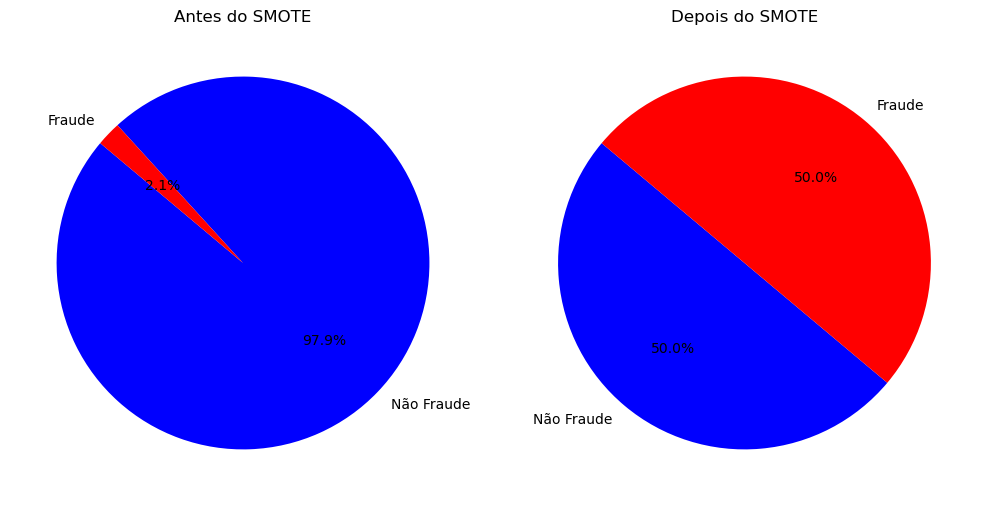

In [48]:
labels = ['Não Fraude', 'Fraude']
colors = ['blue', 'red']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie([count_no_fraud, count_fraud], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Antes do SMOTE')

plt.subplot(1, 2, 2)
plt.pie([count_no_fraud_sm, count_fraud_sm], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Depois do SMOTE')

plt.savefig('distribuicao_label_SMOTE.png')

plt.tight_layout()
plt.show()

#### Técnica de Undersampling: NearMiss


In [49]:
print("Contagem da label '1', antes do SMOTE: ", count_fraud)
print("Contagem da label '0', antes do SMOTE: ", count_no_fraud) 
  
nm = NearMiss()   
X_nm, y_nm = nm.fit_resample(X, y.ravel()) 
  
print("Shape de X (com NearMiss): ", X_nm.shape) 
print("Shape de y (com NearMiss): ", y_nm.shape)

count_fraud_nm = sum(y_nm == 1)
count_no_fraud_nm = sum(y_nm == 0)
  
print("Contagem da label '1', depois do NearMiss: ", count_fraud_nm)
print("Contagem da label '0', depois do NearMiss: ", count_no_fraud_nm)

Contagem da label '1', antes do SMOTE:  21057
Contagem da label '0', antes do SMOTE:  970039
Shape de X (com NearMiss):  (42114, 11)
Shape de y (com NearMiss):  (42114,)
Contagem da label '1', depois do NearMiss:  21057
Contagem da label '0', depois do NearMiss:  21057


#### Divisão em dados de treino e teste com SMOTE

In [50]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print("Training set:", X_train_sm.shape)
print("Testing set:", X_test_sm.shape)

Training set: (1552062, 11)
Testing set: (388016, 11)


#### Divisão em dados de treino e teste com NearMiss

In [51]:
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=0.2, random_state=42)

print("Training set:", X_train_nm.shape)
print("Testing set:", X_test_nm.shape)

Training set: (33691, 11)
Testing set: (8423, 11)


# 4. Modelagem

### K-nearest Neighbors

##### Com SMOTE

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [53]:
print("Training accuracy: ", knn.score(X_train_sm, y_train_sm))

print("Test set accuracy: ", knn.score(X_test_sm, y_test_sm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_sm, knn.predict(X_test_sm)))

print("Test set precision: ", metrics.precision_score(y_test_sm, knn.predict(X_test_sm)))

print("Test set recall: ", metrics.recall_score(y_test_sm, knn.predict(X_test_sm)))

print("Test set f1 score: ", metrics.f1_score(y_test_sm, knn.predict(X_test_sm)))

Training accuracy:  0.9396003510169052
Test set accuracy:  0.9086816007587316
Confusion matrix:
[[165729  27871]
 [  7562 186854]]
Test set precision:  0.8702014204214693
Test set recall:  0.961104024360135
Test set f1 score:  0.9133966041046974


##### Com NearMiss

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_nm, y_train_nm)

KNeighborsClassifier()

In [55]:
print("Training accuracy: ", knn.score(X_train_nm, y_train_nm))

print("Test set accuracy: ", knn.score(X_test_nm, y_test_nm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_nm, knn.predict(X_test_nm)))

print("Test set precision: ", metrics.precision_score(y_test_nm, knn.predict(X_test_nm)))

print("Test set recall: ", metrics.recall_score(y_test_nm, knn.predict(X_test_nm)))

print("Test set f1 score: ", metrics.f1_score(y_test_nm, knn.predict(X_test_nm)))

Training accuracy:  0.7819595737734113
Test set accuracy:  0.6995132375638133
Confusion matrix:
[[3686  569]
 [1962 2206]]
Test set precision:  0.7949549549549549
Test set recall:  0.5292706333973128
Test set f1 score:  0.635460175716549


### Decision Trees

##### Com SMOTE

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [57]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_9 <= 100.99
|   |--- feature_9 <= 100.03
|   |   |--- feature_9 <= 99.99
|   |   |   |--- class: 0
|   |   |--- feature_9 >  99.99
|   |   |   |--- feature_6 <= 277205.50
|   |   |   |   |--- feature_0 <= 1980193472.00
|   |   |   |   |   |--- feature_1 <= 1051968.50
|   |   |   |   |   |   |--- feature_0 <= 1761842112.00
|   |   |   |   |   |   |   |--- feature_0 <= 1761368704.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 50551.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 1724574272.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  1724574272.00
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 74485.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  74485.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |--- feature_2 >  50551.00
|   |   |   |   |   |   | 

In [58]:
print("Training accuracy: ", dt.score(X_train_sm, y_train_sm))

print("Test set accuracy: ", dt.score(X_test_sm, y_test_sm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_sm, dt.predict(X_test_sm)))

print("Test set precision: ", metrics.precision_score(y_test_sm, dt.predict(X_test_sm)))

print("Test set recall: ", metrics.recall_score(y_test_sm, dt.predict(X_test_sm)))

print("Test set f1 score: ", metrics.f1_score(y_test_sm, dt.predict(X_test_sm)))

Training accuracy:  1.0
Test set accuracy:  0.9441002432889365
Confusion matrix:
[[180937  12663]
 [  9027 185389]]
Test set precision:  0.9360622462787551
Test set recall:  0.9535686363262283
Test set f1 score:  0.9447343477684805


##### Com NearMiss

In [59]:
dt = DecisionTreeClassifier(max_depth=29)
dt.fit(X_train_nm,y_train_nm)

DecisionTreeClassifier(max_depth=29)

In [60]:
print("Training accuracy: ", dt.score(X_train_nm, y_train_nm))

print("Test set accuracy: ", dt.score(X_test_nm, y_test_nm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_nm, dt.predict(X_test_nm)))

print("Test set precision: ", metrics.precision_score(y_test_nm, dt.predict(X_test_nm)))

print("Test set recall: ", metrics.recall_score(y_test_nm, dt.predict(X_test_nm)))

print("Test set f1 score: ", metrics.f1_score(y_test_nm, dt.predict(X_test_nm)))

Training accuracy:  0.9183758273722953
Test set accuracy:  0.6060785943250623
Confusion matrix:
[[2701 1554]
 [1764 2404]]
Test set precision:  0.607377463365336
Test set recall:  0.5767754318618042
Test set f1 score:  0.5916810238739848


### Random Forest

##### Com SMOTE

In [61]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_sm,y_train_sm.ravel())

RandomForestClassifier(random_state=42)

In [62]:
print("Training accuracy: ", random_forest.score(X_train_sm, y_train_sm))

y_pred_sm = random_forest.predict(X_test_sm)
print("Test set accuracy: ", metrics.accuracy_score(y_pred_sm, y_test_sm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_sm, random_forest.predict(X_test_sm)))

print("Test set precision: ", metrics.precision_score(y_test_sm, random_forest.predict(X_test_sm)))

print("Test set recall: ", metrics.recall_score(y_test_sm, random_forest.predict(X_test_sm)))

print("Test set f1 score: ", metrics.f1_score(y_test_sm, random_forest.predict(X_test_sm)))

Training accuracy:  0.9999967784792102
Test set accuracy:  0.9795910477918436
Confusion matrix:
[[189171   4429]
 [  3490 190926]]
Test set precision:  0.9773284533285557
Test set recall:  0.9820488025676899
Test set f1 score:  0.9796829420351951


##### Com NearMiss

In [63]:
random_forest.fit(X_train_nm,y_train_nm.ravel())

RandomForestClassifier(random_state=42)

In [64]:
print("Training accuracy: ", random_forest.score(X_train_nm, y_train_nm))

y_pred_nm = random_forest.predict(X_test_nm)
print("Test set accuracy: ", metrics.accuracy_score(y_pred_nm, y_test_nm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_nm, random_forest.predict(X_test_nm)))

print("Test set precision: ", metrics.precision_score(y_test_nm, random_forest.predict(X_test_nm)))

print("Test set recall: ", metrics.recall_score(y_test_nm, random_forest.predict(X_test_nm)))

print("Test set f1 score: ", metrics.f1_score(y_test_nm, random_forest.predict(X_test_nm)))

Training accuracy:  1.0
Test set accuracy:  0.6726819423008429
Confusion matrix:
[[3036 1219]
 [1538 2630]]
Test set precision:  0.6832943621719927
Test set recall:  0.6309980806142035
Test set f1 score:  0.6561057752276412


### AdaBoost

##### Com SMOTE

In [65]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_sm,y_train_sm.ravel())

AdaBoostClassifier()

In [66]:
print("Training accuracy: ", adaboost.score(X_train_sm, y_train_sm))

y_pred_sm = adaboost.predict(X_test_sm)
print("Test set accuracy: ", metrics.accuracy_score(y_pred_sm, y_test_sm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_sm, adaboost.predict(X_test_sm)))

print("Test set precision: ", metrics.precision_score(y_test_sm, adaboost.predict(X_test_sm)))

print("Test set recall: ", metrics.recall_score(y_test_sm, adaboost.predict(X_test_sm)))

print("Test set f1 score: ", metrics.f1_score(y_test_sm, adaboost.predict(X_test_sm)))

Training accuracy:  0.7810957294231803
Test set accuracy:  0.7811043874479403
Confusion matrix:
[[144126  49474]
 [ 35461 158955]]
Test set precision:  0.7626337985597014
Test set recall:  0.8176024607028228
Test set f1 score:  0.789162084672765


##### Com NearMiss

In [67]:
adaboost.fit(X_train_nm,y_train_nm.ravel())

AdaBoostClassifier()

In [68]:
print("Training accuracy: ", adaboost.score(X_train_nm, y_train_nm))

y_pred_nm = adaboost.predict(X_test_nm)
print("Test set accuracy: ", metrics.accuracy_score(y_pred_nm, y_test_nm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_nm, adaboost.predict(X_test_nm)))

print("Test set precision: ", metrics.precision_score(y_test_nm, adaboost.predict(X_test_nm)))

print("Test set recall: ", metrics.recall_score(y_test_nm, adaboost.predict(X_test_nm)))

print("Test set f1 score: ", metrics.f1_score(y_test_nm, adaboost.predict(X_test_nm)))

Training accuracy:  0.6499955477724021
Test set accuracy:  0.6482250979461
Confusion matrix:
[[3055 1200]
 [1763 2405]]
Test set precision:  0.6671289875173371
Test set recall:  0.5770153550863724
Test set f1 score:  0.6188086967708737


### GradientBoosting

##### Com SMOTE

In [69]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier()

In [70]:
print("Training accuracy: ", gboost.score(X_train_sm, y_train_sm))

y_pred_sm = gboost.predict(X_test_sm)
print("Test set accuracy: ", metrics.accuracy_score(y_pred_sm, y_test_sm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_sm, y_pred_sm))

print("Test set precision: ", metrics.precision_score(y_test_sm, y_pred_sm))

print("Test set recall: ", metrics.recall_score(y_test_sm, y_pred_sm))

print("Test set f1 score: ", metrics.f1_score(y_test_sm, y_pred_sm))

Training accuracy:  0.8055077696638407
Test set accuracy:  0.8055801822605253
Confusion matrix:
[[150527  43073]
 [ 32365 162051]]
Test set precision:  0.7900148203038162
Test set recall:  0.8335270759608263
Test set f1 score:  0.8111878660459529


##### Com NearMiss

In [71]:
gboost.fit(X_train_nm,y_train_nm)

GradientBoostingClassifier()

In [72]:
print("Training accuracy: ", gboost.score(X_train_nm, y_train_nm))

y_pred_nm = gboost.predict(X_test_nm)
print("Test set accuracy: ", metrics.accuracy_score(y_pred_nm, y_test_nm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_nm, y_pred_nm))

print("Test set precision: ", metrics.precision_score(y_test_nm, y_pred_nm))

print("Test set recall: ", metrics.recall_score(y_test_nm, y_pred_nm))

print("Test set f1 score: ", metrics.f1_score(y_test_nm, y_pred_nm))

Training accuracy:  0.6723160487964145
Test set accuracy:  0.6638964739404013
Confusion matrix:
[[3080 1175]
 [1656 2512]]
Test set precision:  0.6813127203688636
Test set recall:  0.6026871401151631
Test set f1 score:  0.6395926161680457


### Logistic Regression

##### Com SMOTE

In [73]:
lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [74]:
print("Training accuracy: ", lr.score(X_train_sm, y_train_sm))

print("Test set accuracy: ", lr.score(X_test_sm, y_test_sm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_sm, lr.predict(X_test_sm)))

print("Test set precision: ", metrics.precision_score(y_test_sm, lr.predict(X_test_sm)))

print("Test set recall: ", metrics.recall_score(y_test_sm, lr.predict(X_test_sm)))

print("Test set f1 score: ", metrics.f1_score(y_test_sm, lr.predict(X_test_sm)))

Training accuracy:  0.5648736970559166
Test set accuracy:  0.5643633252237021
Confusion matrix:
[[ 86290 107310]
 [ 61724 132692]]
Test set precision:  0.5528787260106166
Test set recall:  0.6825158423175047
Test set f1 score:  0.6108954969637538


##### Com NearMiss

In [75]:
lr.fit(X_train_nm, y_train_nm)

LogisticRegression()

In [76]:
print("Training accuracy: ", lr.score(X_train_nm, y_train_nm))

print("Test set accuracy: ", lr.score(X_test_nm, y_test_nm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_nm, lr.predict(X_test_nm)))

print("Test set precision: ", metrics.precision_score(y_test_nm, lr.predict(X_test_nm)))

print("Test set recall: ", metrics.recall_score(y_test_nm, lr.predict(X_test_nm)))

print("Test set f1 score: ", metrics.f1_score(y_test_nm, lr.predict(X_test_nm)))

Training accuracy:  0.6308212875842213
Test set accuracy:  0.6295856583165143
Confusion matrix:
[[2762 1493]
 [1627 2541]]
Test set precision:  0.6298958849776897
Test set recall:  0.6096449136276392
Test set f1 score:  0.6196049743964888


### Naive Bayes

##### Com SMOTE

In [77]:
nb = GaussianNB()
nb.fit(X_train_sm, y_train_sm)

GaussianNB()

In [78]:
print("Training accuracy: ", nb.score(X_train_sm, y_train_sm))

print("Test set accuracy: ", nb.score(X_test_sm, y_test_sm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_sm, nb.predict(X_test_sm)))

print("Test set precision: ", metrics.precision_score(y_test_sm, nb.predict(X_test_sm)))

print("Test set recall: ", metrics.recall_score(y_test_sm, nb.predict(X_test_sm)))

print("Test set f1 score: ", metrics.f1_score(y_test_sm, nb.predict(X_test_sm)))

Training accuracy:  0.5847008689085874
Test set accuracy:  0.5850789658158426
Confusion matrix:
[[ 59106 134494]
 [ 26502 167914]]
Test set precision:  0.5552564746964366
Test set recall:  0.8636840589251913
Test set f1 score:  0.6759496320628633


##### Com NearMiss

In [79]:
nb.fit(X_train_nm, y_train_nm)

GaussianNB()

In [80]:
print("Training accuracy: ", nb.score(X_train_nm, y_train_nm))

print("Test set accuracy: ", nb.score(X_test_nm, y_test_nm))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test_nm, nb.predict(X_test_nm)))

print("Test set precision: ", metrics.precision_score(y_test_nm, nb.predict(X_test_nm)))

print("Test set recall: ", metrics.recall_score(y_test_nm, nb.predict(X_test_nm)))

print("Test set f1 score: ", metrics.f1_score(y_test_nm, nb.predict(X_test_nm)))

Training accuracy:  0.6243210352913241
Test set accuracy:  0.6293482132256916
Confusion matrix:
[[3016 1239]
 [1883 2285]]
Test set precision:  0.648410896708286
Test set recall:  0.5482245681381958
Test set f1 score:  0.5941237649505979


#### Visualização dos resultados (SMOTE vs NearMiss)

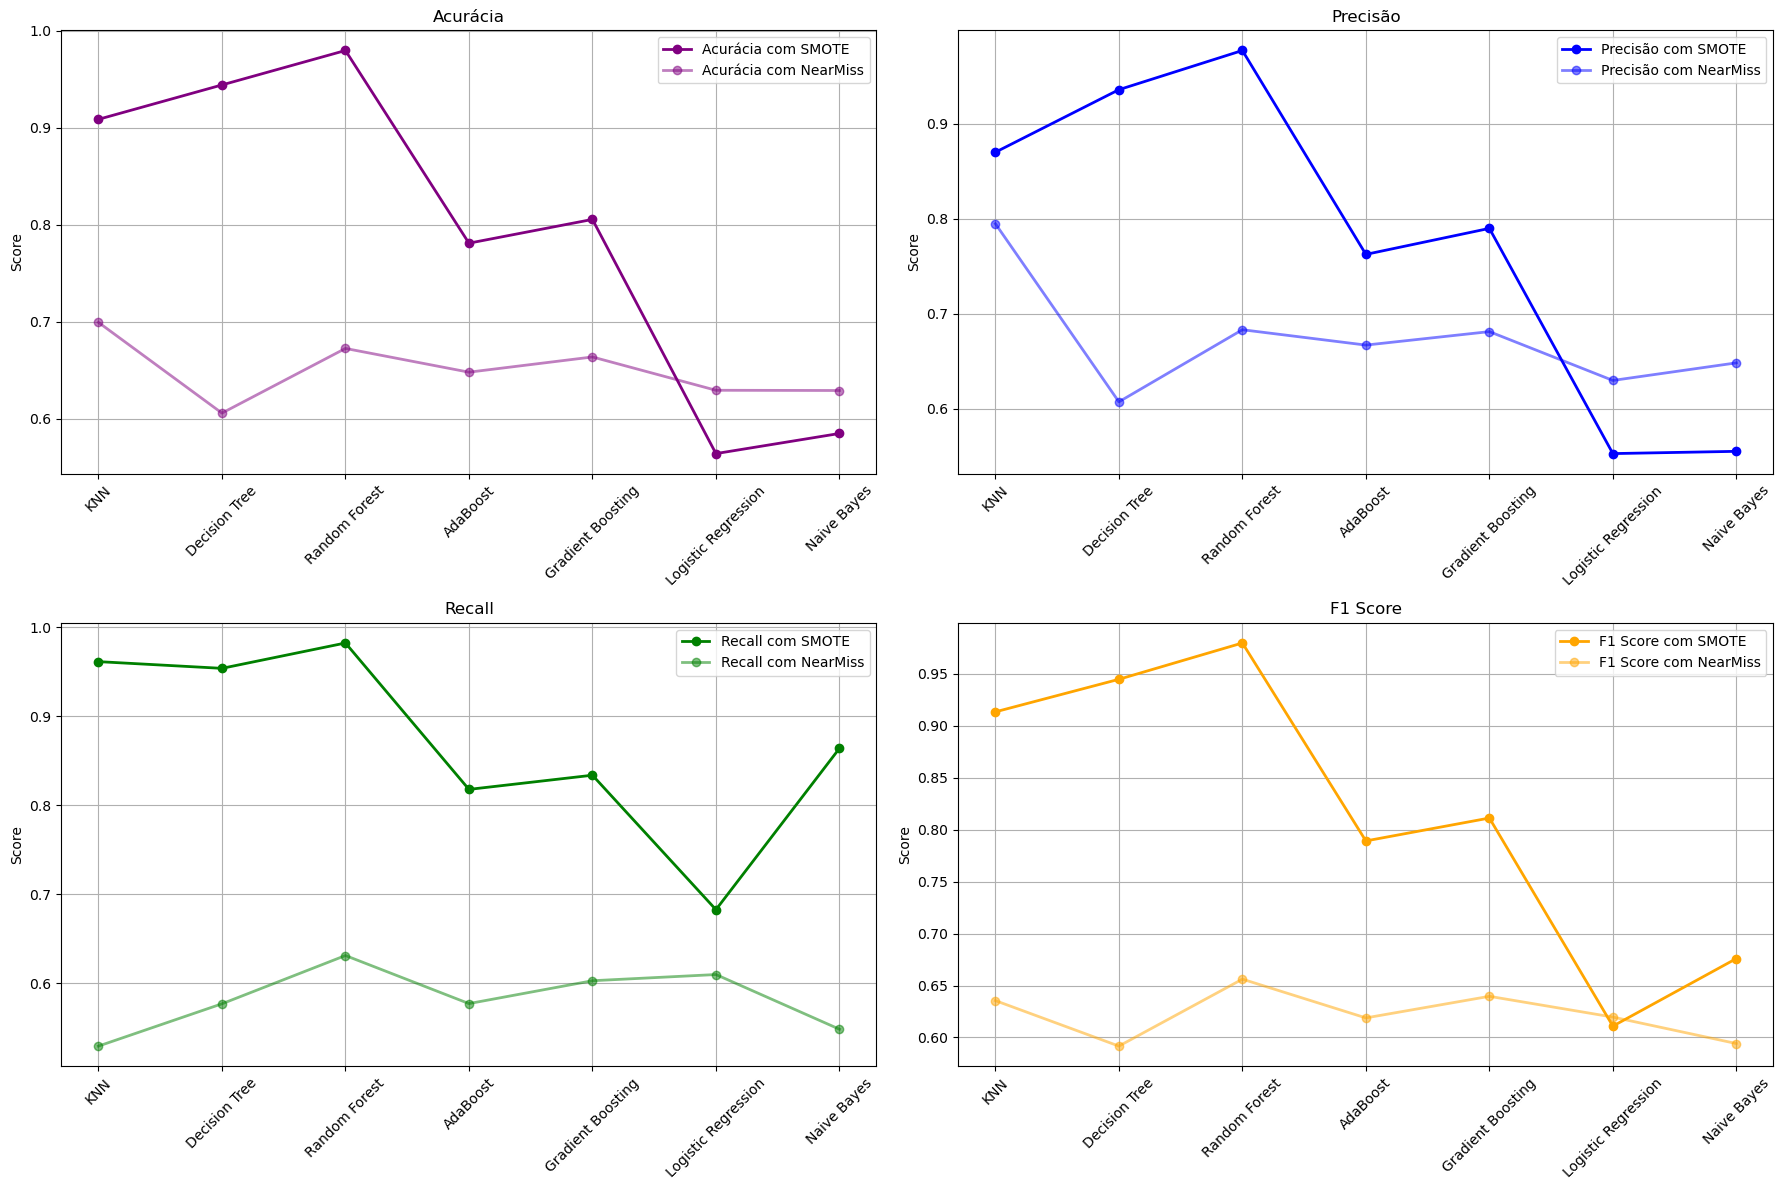

In [85]:
models = ['KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression', 'Naive Bayes']
accuracy = [0.9086816007587316, 0.9441002432889365, 0.9795910477918436, 0.7811043874479403, 0.8055801822605253, 0.5643633252237021, 0.5850789658158426]
precision = [0.8702014204214693, 0.9360622462787551, 0.9773284533285557, 0.7626337985597014, 0.7900148203038162, 0.5528787260106166, 0.5552564746964366]
recall = [0.961104024360135, 0.9535686363262283, 0.9820488025676899, 0.8176024607028228, 0.8335270759608263, 0.6825158423175047, 0.8636840589251913]
f1_score = [0.9133966041046974, 0.9447343477684805, 0.9796829420351951, 0.789162084672765, 0.8111878660459529, 0.6108954969637538, 0.6759496320628633]

accuracy_with_nm = [0.6995132375638133, 0.6060785943250623, 0.6726819423008429, 0.6482250979461, 0.6638964739404013, 0.6295856583165143, 0.6293482132256916]
precision_with_nm = [0.7949549549549549, 0.607377463365336, 0.6832943621719927, 0.6671289875173371, 0.6813127203688636, 0.6298958849776897, 0.648410896708286]
recall_with_nm = [0.5292706333973128,0.5767754318618042, 0.6309980806142035, 0.5770153550863724, 0.6026871401151631, 0.6096449136276392, 0.5482245681381958]
f1_score_with_nm = [0.635460175716549, 0.5916810238739848, 0.6561057752276412, 0.6188086967708737, 0.6395926161680457, 0.6196049743964888, 0.5941237649505979]

plt.figure(figsize=(18, 12))

# Acurácia
plt.subplot(2, 2, 1)
plt.plot(models, accuracy, marker='o', linestyle='-', color='purple', label='Acurácia com SMOTE', linewidth=2)
plt.plot(models, accuracy_with_nm, marker='o', linestyle='-', color='purple', label='Acurácia com NearMiss', linewidth=2, alpha=0.5)
plt.title('Acurácia')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Precisão
plt.subplot(2, 2, 2)
plt.plot(models, precision, marker='o', linestyle='-', color='blue', label='Precisão com SMOTE', linewidth=2)
plt.plot(models, precision_with_nm, marker='o', linestyle='-', color='blue', label='Precisão com NearMiss', linewidth=2, alpha=0.5)
plt.title('Precisão')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Recall
plt.subplot(2, 2, 3)
plt.plot(models, recall, marker='o', linestyle='-', color='green', label='Recall com SMOTE', linewidth=2)
plt.plot(models, recall_with_nm, marker='o', linestyle='-', color='green', label='Recall com NearMiss', linewidth=2, alpha=0.5)
plt.title('Recall')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# F1 score
plt.subplot(2, 2, 4)
plt.plot(models, f1_score, marker='o', linestyle='-', color='orange', label='F1 Score com SMOTE', linewidth=2)
plt.plot(models, f1_score_with_nm, marker='o', linestyle='-', color='orange', label='F1 Score com NearMiss', linewidth=2, alpha=0.5)
plt.title('F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 5. Avaliação

O algoritmo Random Forest foi o que mais se destacou entre os sete testados, alcançando uma acurácia de teste de 97.96% e com uma precisão, recall e F1 score de 97,73%, 98,20% e 97,97%, respetivamente.

# 6. Implementação

Esta é a última fase da metodologia CRISP-DM e divide-se nas seguintes etapas:
* Definição do plano de entrega;
* Definição do plano de monitorização e manutenção;
* Construção do relatório final;
* Revisão do projeto.
